# Deep Learning Approach with Tensorflow

In [ ]:
import tensorflow as tf

Read in data.

In [ ]:
from utils import read_data
df, X, y1, y2 = read_data("~/GitHub/3pt-shooting/data/preprocessed.csv")
display(df.head())

,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,3P,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,next_3P%,3pt_dif
0,PG,31.0,ATL,80,80,2195,268,644,0.416,126,...,3.0,1.7,4.8,0.104,0.1,-0.2,-0.2,1.0,0.433825,0.044825
1,SG,29.0,ATL,79,0,2460,496,1105,0.449,163,...,5.6,1.7,7.3,0.143,3.5,-1.1,2.4,2.7,0.341000,-0.041000
2,SF,31.0,ATL,79,5,1317,175,393,0.445,57,...,2.1,1.1,3.1,0.114,-0.4,-0.6,-0.9,0.4,0.326041,-0.010959
3,SG,28.0,ATL,76,76,2886,635,1386,0.458,129,...,6.0,2.4,8.4,0.140,3.4,-0.7,2.7,3.4,0.297000,-0.072000
4,SF,23.0,ATL,81,81,2468,302,664,0.455,40,...,3.1,2.6,5.7,0.112,-0.4,0.1,-0.4,1.0,0.336000,0.033000


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from utils import pipeline

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)
    
ord_names = ['GS', 'SEASON']
preprocessor = pipeline(X, ord_names)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

Design keras model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def design_model(X, learning_rate):

    model = Sequential()
    model.add(InputLayer(input_shape=(X.shape[1],)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32))
    model.add(Dropout(0.3))
    model.add(Dense(16,activation='relu'))
    # model.add(Dense(16))
    model.add(Dropout(0.3))
    model.add(Dense(8,activation='relu'))
    # model.add(Dense(8))
    model.add(Dense(1))
    opt = Adam(learning_rate = learning_rate)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model

def fit_tf(model, X, y, epochs, batch_size=16, verbose=0):

    es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience = 20)

    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_split=0.3, callbacks=[es])

    return model, history

In [ ]:
model = design_model(X_train_scaled, 0.001)
model1, history = fit_tf(model, X_train_scaled, y1_train, epochs=500)


Epoch 00068: early stopping


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:

train_mse, train_mae = model1.evaluate(X_train_scaled, y1_train, verbose=0)
print(train_mse)
print(train_mae)

val_mse, val_mae = model1.evaluate(X_test_scaled, y1_test, verbose=0)
print(val_mse)
print(val_mae)


0.0017539151012897491
0.03249090537428856
0.001781841623596847
0.03269731253385544


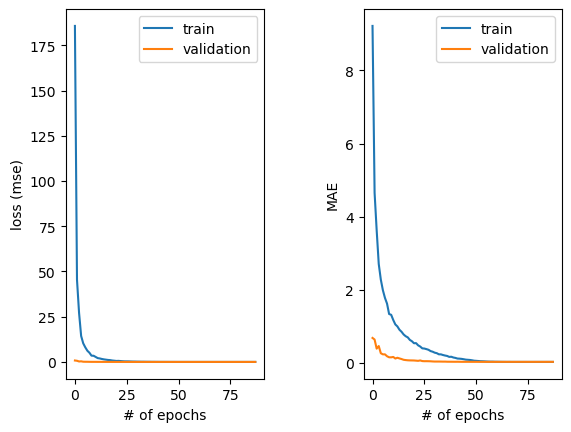

In [ ]:
import matplotlib.pyplot as plt

def plot(history):
  #plotting
  fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 1, 'wspace': 0.5}) 
  (ax1, ax2) = axs
  ax1.plot(history.history['loss'], label='train')
  ax1.plot(history.history['val_loss'], label='validation')
  ax1.legend(loc="upper right")
  ax1.set_xlabel("# of epochs")
  ax1.set_ylabel("loss (mse)")

  ax2.plot(history.history['mae'], label='train')
  ax2.plot(history.history['val_mae'], label='validation')
  ax2.legend(loc="upper right")
  ax2.set_xlabel("# of epochs")
  ax2.set_ylabel("MAE")
  plt.show()

plot(history)